<font size="+3" color="darkgreen"><i><b><center>Prediction using Decision Tree Algorithm</center></b></i></font>
<font size="+2" color="green"><i><center>(Level-Intermediate)</center></i></font>

<font size="+1" color="darkblue"><b>Task#6</b></font><br><br>

<font size="+1" color="darkblue"><b>Company: [The Sparks Foundation](https://www.linkedin.com/company/the-sparks-foundation/)</b></font><br><br><font size="+1" color="darkblue"><b>Internship Profile: Data Science and Business Analytics</b></font><br><br>
><font size="+1" color="black"><b>About me:</b></font><br><br>
Name:**Sagar Gupta**
>
>> **LinkedIn Id**:      
https://www.linkedin.com/in/sagar-gupta-b3b20714b/

>> **Kaggle Id**:                       
https://www.kaggle.com/sagargupta831


<font size="+1" color="brown">What is Decision Trees?</b></font><br><br>
Decision trees are a supervised learning method with a benefits of using for both regression and classification. Feature scaling is not required in case of decision trees and also it is easy to interpret by visualising the decision trees. We can visualize and create a powerful model with best parameters.




<font size="+1" color="darkblue"><b>Task Objective:</b></font><br><br> Create the Decision Tree classifier and visualize it graphically. Also check if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

**Dataset**: [Iris Dataset](https://bit.ly/3kXTdox)
     
     Format: Iris.csv

<font size="+1" color="brwon"><b>Import Libraries</b></font><br><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

<font size="+1" color="brwon"><b>Load the Dataset</b></font><br><br>


In [2]:
df = pd.read_csv('Iris.csv')

<font size="+1" color="brwon"><b>Insights of Dataset</b></font><br><br>


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Information of dataset:



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


It seems there is no missing value on the dataset. All of the width and length column represented using ```float64``` and the name of the species using ```object``` or ```string```. 
Also there is no use of Id column. So droping the Id columns.

In [6]:
df = df.drop(columns=['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


By droping the Id column, now let’s check a quick summary of our data.

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It seems that given data is normal. Let's visualize the whole data using seaborn library.

### Iris Data Visualization:

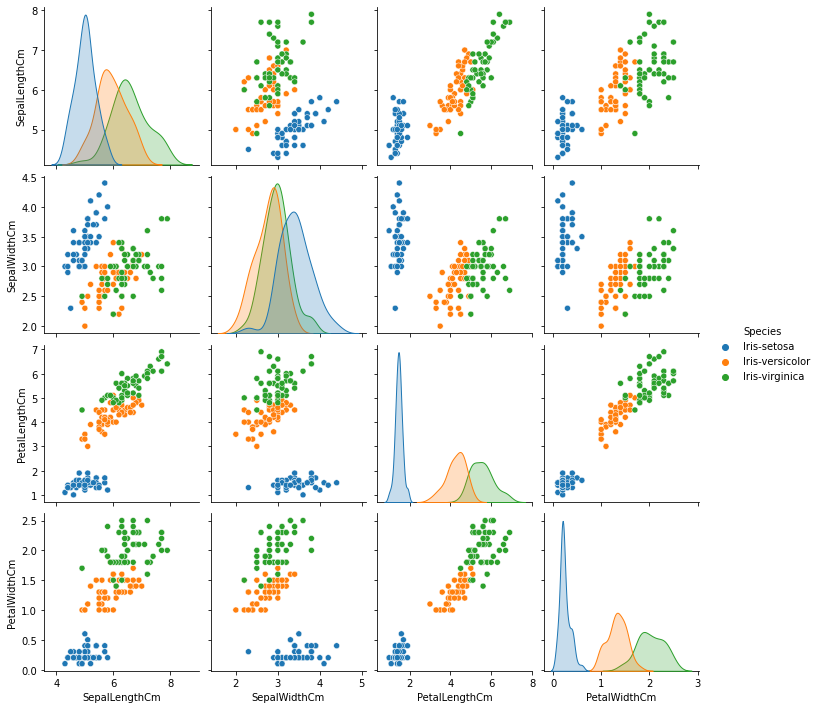

In [9]:
sns.pairplot(df, hue='Species')

We see here that most of them are already separated based on those properties. But there are some outliers present in the data. Those outliers might be from wrong data or maybe it is really a data anomaly. Let's go and seperate the target value from the dataset.

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


<font size="+1" color="brwon"><b>Splitting the Dataset</b></font><br><br>


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

<font size="+1" color="brwon"><b>Classification Model</b></font><br><br>


In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction:



In [20]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

### Accuracy Score and Classification Report

In [22]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



<font size="+1" color="brwon"><b>K-fold Cross-Validation</b></font><br><br>
Cross-validation is a powerful preventative measure against overfitting. It is a resampling procedure used to evaluate machine learning models on a limited data sample

In [23]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Decision Tree Classifier Accuracy of {:.2f}% with std deviation of {:.02f}% ".format(accuracies.mean()*100,accuracies.std()*100))


Decision Tree Classifier Accuracy of 96.44% with std deviation of 4.37% 


<font size="+1" color="blue"><b>We got accuracy of 96.44%.</b></font><br><br>
With a standard deviation of 4.37%, Our model accuracy is good. We can improve our accuracy by finding the best parameters for the decision tree classifier by using the method of ```GridSearchCV```

<font size="+2" color="brwon"><b>Visualizing Decision Tree graphically</b></font><br><br>

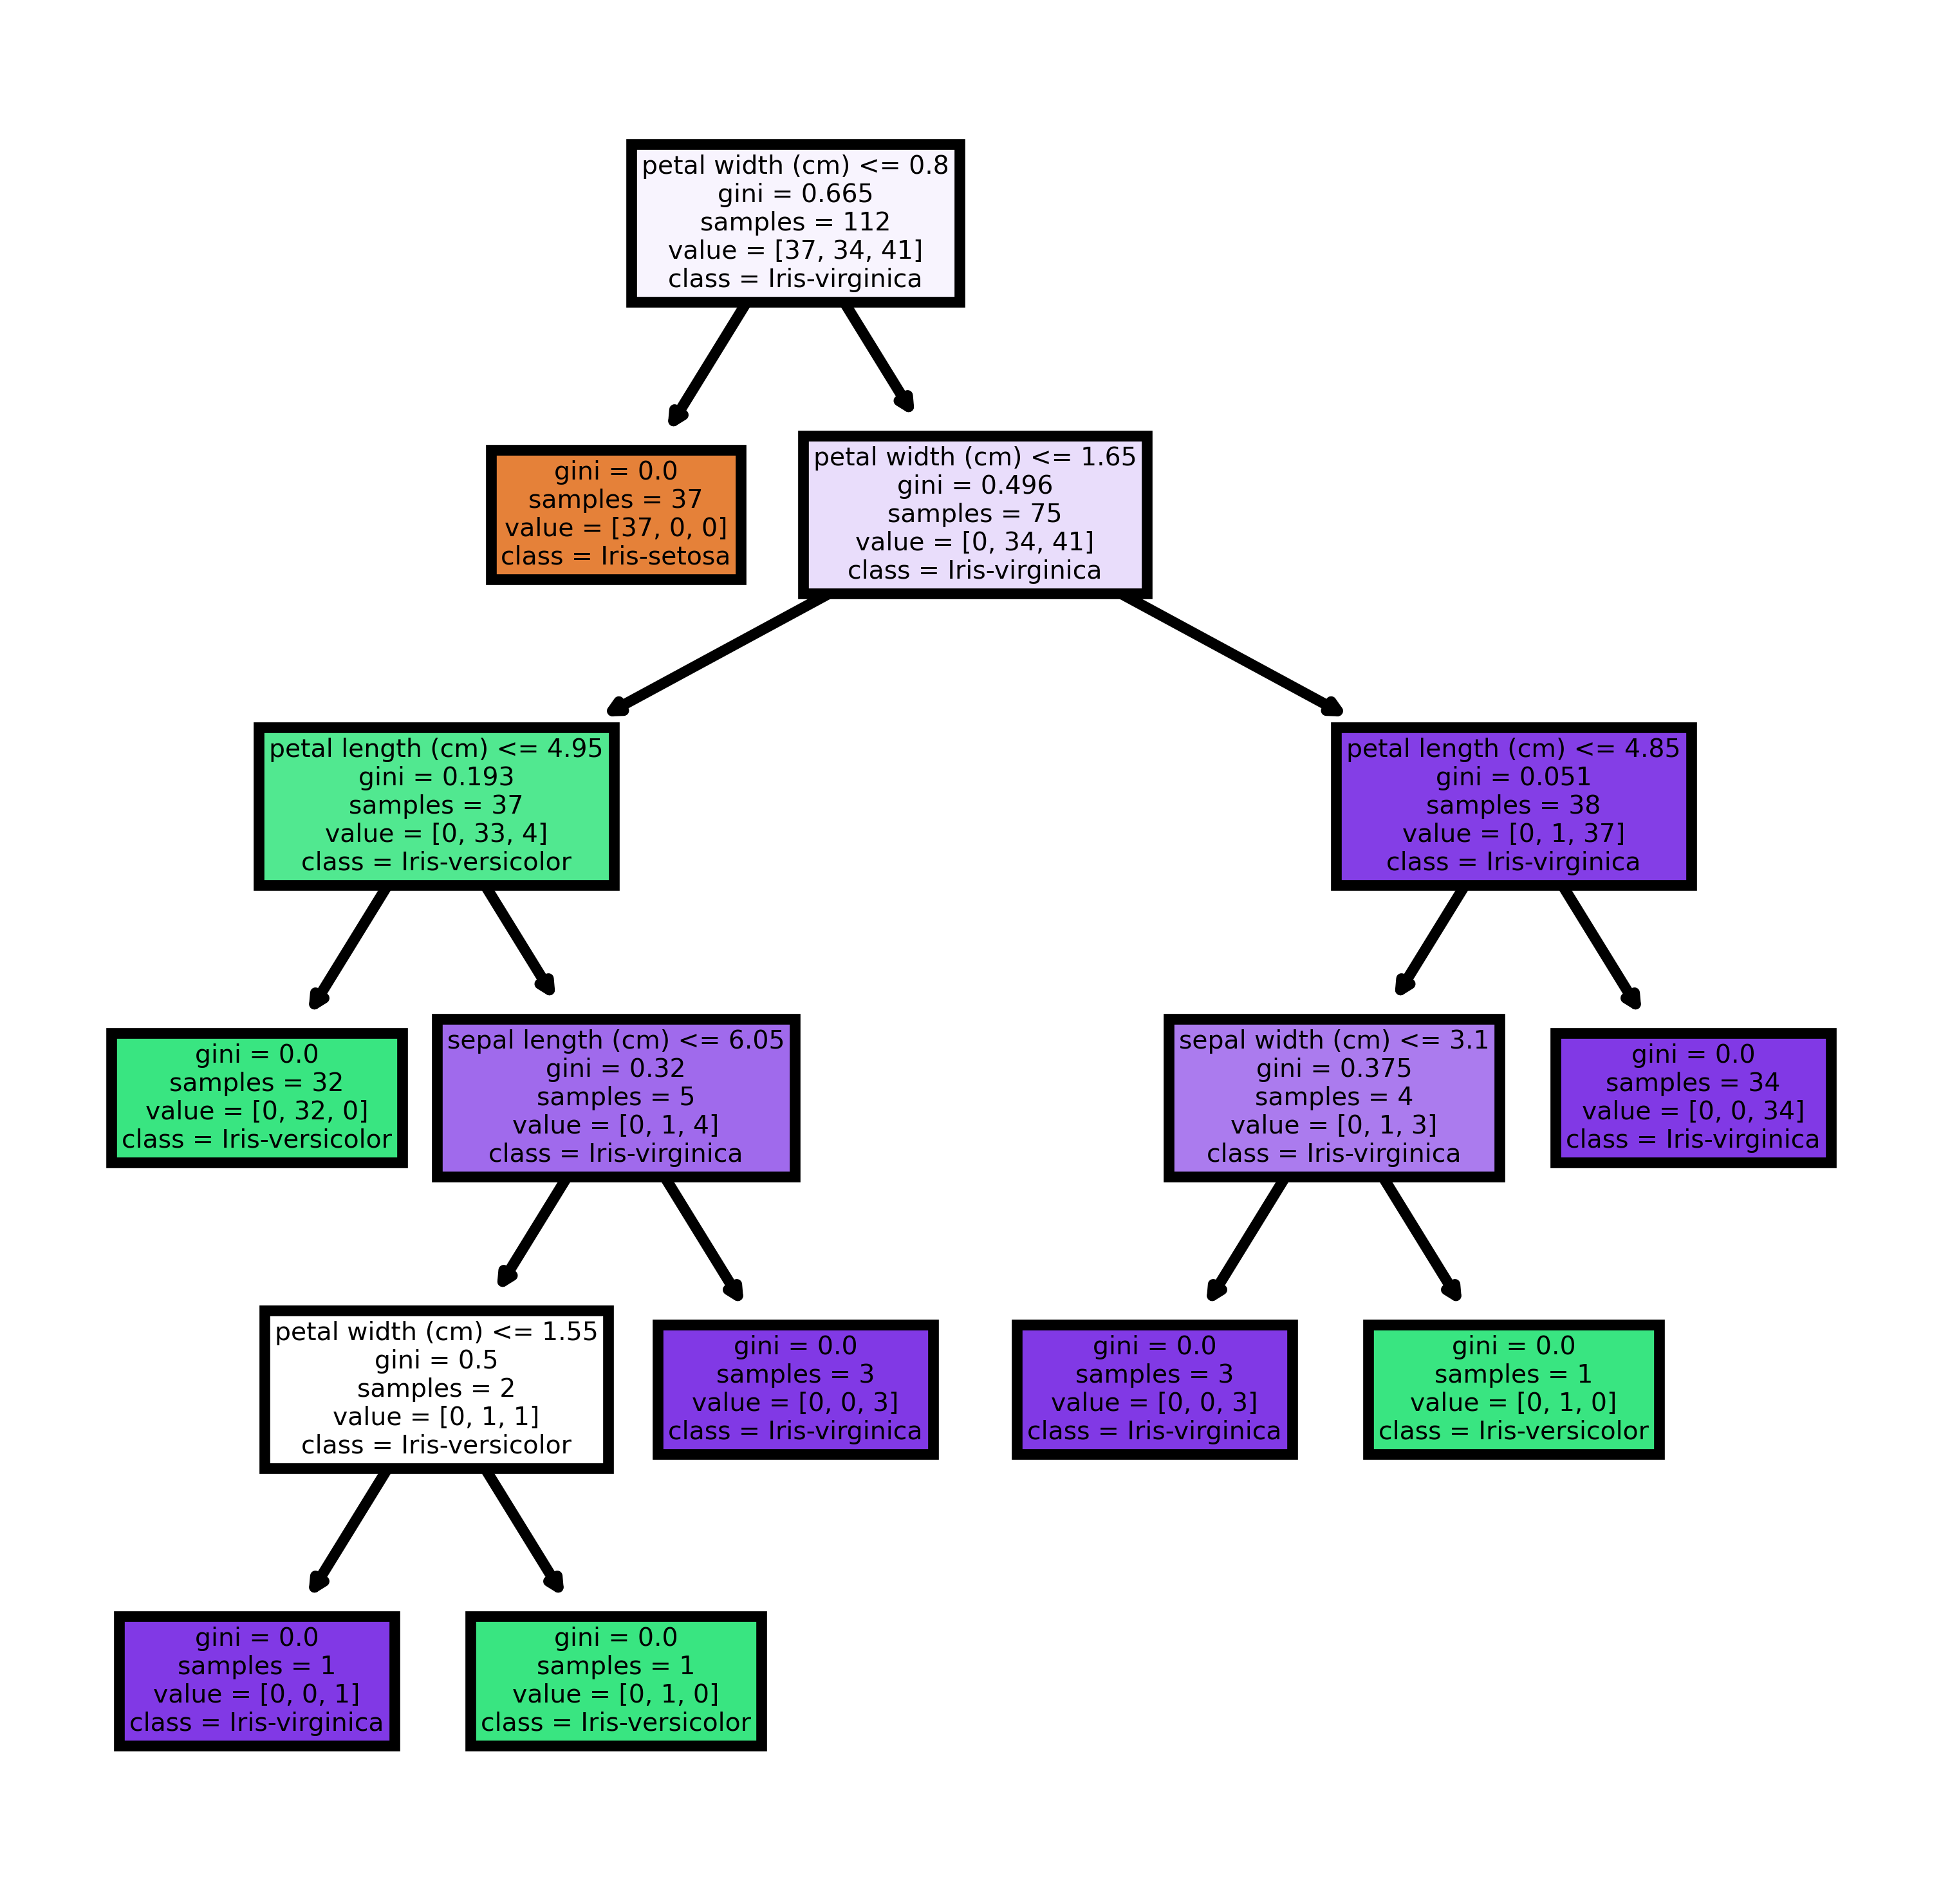

In [31]:
from sklearn import tree
feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1200)
tree.plot_tree(classifier,
               feature_names = feature_names, 
               class_names = class_names,
               filled = True);
fig.savefig('tree_image.png')

<font size="+2" color="brwon"><b>Thank You!</b></font><br><br>